In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.interactive import printing
import sympy as sp

import brian2 as b2
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

printing.init_printing(use_latex=True)

### Leaky Integrate-and-Fire (LIF) Model

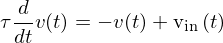

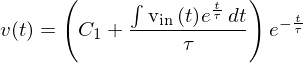

In [2]:
v = sp.Function('v')
v_in = sp.Function('v_in')
t, tau = sp.symbols('t, tau')

diff_eq = sp.Eq(tau*v(t).diff(t), v_in(t)-v(t))
display(diff_eq)

diff_eq_sol = sp.dsolve(diff_eq, v(t))
display(diff_eq_sol)

### LIF Firing Rate, constant v_in, v(0)=0

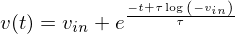

In [3]:
v_in = sp.symbols('v_in')
diff_eq = sp.Eq(tau*v(t).diff(t), v_in-v(t))
diff_eq_sol = sp.dsolve(diff_eq, v(t), ics={v(0):0})
display(diff_eq_sol)
LIF_Rate = sp.simplify(diff_eq_sol)
LIF_Rate

### Neuronaldynamics Exercises

nr of spikes: 5


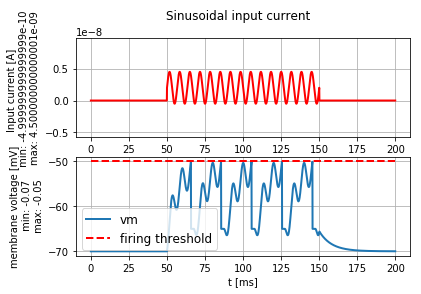

In [6]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(500, 1500, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=150*b2.Hz,
                                            direct_current=2. * b2.namp)


'''
Default values
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms
'''

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 200 * b2.ms, firing_threshold=-50.*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current", firing_threshold=-50.*b2.mV)
print("nr of spikes: {}".format(spike_monitor.count[0]))